# **Suggestion System**
How many points would **Luis give to** Ilhabela, Marau and Ilha de Boipeba? 

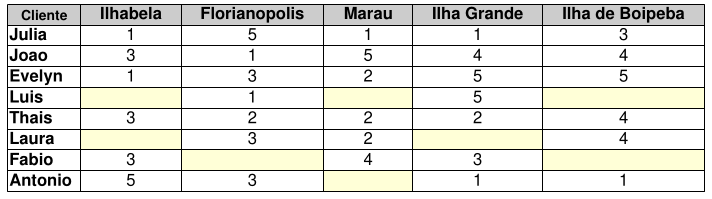

* Click the **Play icon** in the left gutter of the cell;


# Load data

In [12]:
import math
nan = float('nan')
db = {'Julia': {'Ilhabela': 1.0, 'Florianopolis': 5.0, 'Marau': 1.0, 'Ilha Grande': 1.0, 'Ilha de Boipeba': 3.0}, 'Joao': {'Ilhabela': 3.0, 'Florianopolis': 1.0, 'Marau': 5.0, 'Ilha Grande': 4.0, 'Ilha de Boipeba': 4.0}, 'Evelyn': {'Ilhabela': 1.0, 'Florianopolis': 3.0, 'Marau': 2.0, 'Ilha Grande': 5.0, 'Ilha de Boipeba': 5.0}, 'Luis': {'Ilhabela': nan, 'Florianopolis': 1.0, 'Marau': nan, 'Ilha Grande': 5.0, 'Ilha de Boipeba': nan}, 'Thais': {'Ilhabela': 3.0, 'Florianopolis': 2.0, 'Marau': 2.0, 'Ilha Grande': 2.0, 'Ilha de Boipeba': 4.0}, 'Laura': {'Ilhabela': nan, 'Florianopolis': 3.0, 'Marau': 2.0, 'Ilha Grande': nan, 'Ilha de Boipeba': 4.0}, 'Fabio': {'Ilhabela': 3.0, 'Florianopolis': nan, 'Marau': 4.0, 'Ilha Grande': 3.0, 'Ilha de Boipeba': nan}, 'Antonio': {'Ilhabela': 5.0, 'Florianopolis': 3.0, 'Marau': nan, 'Ilha Grande': 1.0, 'Ilha de Boipeba': 1.0}}


# Show values

In [13]:
db['Luis']

{'Florianopolis': 1.0,
 'Ilha Grande': 5.0,
 'Ilha de Boipeba': nan,
 'Ilhabela': nan,
 'Marau': nan}

# Load library

In [23]:
from math import sqrt, isnan

def euclidian(dest1, dest2):
    '''
    dest1: array of x value
    dest2: array of y value
    '''
    res = 0

    for x, y in zip(dest1, dest2):
        res += pow(x-y, 2)

    res = sqrt(res)
    return res

def psimilar(similar):
    return 1/(1+similar)

def similar(data, user1, user2):
    dest1=[]
    dest2=[]

    for datum in data[user1]:
        value1 = data[user1][datum]

        if not isnan(value1):
            if datum in data[user2]:
                value2 = data[user2][datum]

                if not isnan(value2):
                    dest1.append(value1)
                    dest2.append(value2)

    return euclidian(dest1, dest2)

def getsimilaruser(data, user):
    similars={}

    for other in list(data.keys()):
        if other != user:
            s = similar(data, user, other)
            similars.setdefault(other, psimilar(s))

    return similars

def getsuggest(data, user):
    similarusers = getsimilaruser(data, user)
    suggest={}

    for datum in data[user]:
        value=data[user][datum]
        
        if isnan(value):
            total=0
            simtotal=0

            for simuser in similarusers:
                valueuser = data[simuser][datum]

                if not isnan(valueuser):
                    total += valueuser * similarusers[simuser]
                    simtotal += similarusers[simuser]
                    
            suggest.setdefault(datum, total / simtotal)
    
    return suggest


# Euclidian distance between Luis and Antonio

In [26]:
similar(db, 'Luis', 'Antonio')


4.47213595499958

# All users and their similarities (percentual) with Luis

In [21]:
getsimilaruser(db, 'Luis')

{'Antonio': 0.1827439976315568,
 'Evelyn': 0.3333333333333333,
 'Fabio': 0.3333333333333333,
 'Joao': 0.5,
 'Julia': 0.15022110482233483,
 'Laura': 0.3333333333333333,
 'Thais': 0.2402530733520421}

# Prediction


In [22]:
getsuggest(db, 'Luis')

{'Ilha de Boipeba': 3.7901471663694766,
 'Ilhabela': 2.6542179882472903,
 'Marau': 3.066634807882753}